# 002 color/palette analysis

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import ImageColor
import colorsys

from pathlib import Path
INPUT_DIR = "../../input"

In [6]:
class ArtDataset(object):
    def __init__(self, file_path: Path):
        self.target = 'likes'
        self.file_path = file_path
        self.train_df = pd.read_csv(self.file_path / 'train.csv')
        self.test_df = pd.read_csv(self.file_path / 'test.csv')
        self.color_df = pd.read_csv(self.file_path / 'color.csv')
        self.historical_df = pd.read_csv(self.file_path / 'historical_person.csv')
        self.maker_df = pd.read_csv(self.file_path / 'maker.csv')
        self.material_df = pd.read_csv(self.file_path / 'material.csv')
        self.object_df = pd.read_csv(self.file_path / 'object_collection.csv')
        self.palette_df = pd.read_csv(self.file_path / 'palette.csv')
        self.principal_occupation_df = pd.read_csv(self.file_path / 'principal_maker_occupation.csv')
        self.principal_maker_df =  pd.read_csv(self.file_path / 'principal_maker.csv')
        self.production_df = pd.read_csv(self.file_path / 'production_place.csv')
        self.technique_df = pd.read_csv(self.file_path / 'technique.csv')
        self.submission = pd.read_csv(self.file_path / 'sample_submission.csv')

    def get_whole_df(self):
        return pd.concat([self.train_df, self.test_df], axis=0).reset_index(drop=True)

    def get_target(self, log: bool = False):
        return np.log1p(self.train_df[self.target].values) if log else self.train_df[self.target].values

art_ds = ArtDataset(file_path=Path(INPUT_DIR))

In [24]:
art_ds.color_df.head(10)

,object_id,percentage,hex
0,001020bd00b149970f78,0,#C7C7B6
1,001020bd00b149970f78,9,#5E5333
2,001020bd00b149970f78,14,#3E321B
3,001020bd00b149970f78,3,#B8AF84
4,001020bd00b149970f78,62,#15120C
5,001020bd00b149970f78,2,#979784
6,001020bd00b149970f78,8,#917F4D
7,0011d6be41612ec9eae3,9,#221811
8,0011d6be41612ec9eae3,3,#A19372
9,0011d6be41612ec9eae3,58,#3E392D


In [26]:
art_ds.palette_df.head(10)

,ratio,color_r,color_g,color_b,object_id
0,0.013781,40,4,0,000405d9a5e3f49fc49d
1,0.040509,221,189,129,000405d9a5e3f49fc49d
2,0.036344,207,175,117,000405d9a5e3f49fc49d
3,0.033316,230,197,129,000405d9a5e3f49fc49d
4,0.039600,194,161,106,000405d9a5e3f49fc49d
5,0.039827,181,148,95,000405d9a5e3f49fc49d
6,0.015825,217,182,113,000405d9a5e3f49fc49d
7,0.041417,170,135,86,000405d9a5e3f49fc49d
8,0.037859,157,122,77,000405d9a5e3f49fc49d
9,0.191186,206,165,100,000405d9a5e3f49fc49d


In [52]:
palette_df = art_ds.palette_df.copy()
palette_df["weighted_r"] = palette_df["color_r"] * palette_df["ratio"]
palette_df["weighted_g"] = palette_df["color_g"] * palette_df["ratio"]
palette_df["weighted_b"] = palette_df["color_b"] * palette_df["ratio"]

agg_df = palette_df.groupby(["object_id"])["weighted_r"].agg(["mean", "var", "std"]).add_prefix("")
agg_df

,a_mean,a_var,a_std
object_id,,,
000405d9a5e3f49fc49d,7.214167,56.884925,7.542210
001020bd00b149970f78,2.513244,1.221336,1.105141
0011d6be41612ec9eae3,3.670945,4.481472,2.116949
0012765f7a97ccc3e9e9,4.232390,1.346868,1.160546
00133be3ff222c9b74b0,5.597381,8.940617,2.990086
...,...,...,...
fff4bbb55fd7702d294e,7.852296,162.185643,12.735213
fffbe07b997bec00e203,9.511901,89.876719,9.480333
fffd1675758205748d7f,5.222880,13.774495,3.711401


## paletteの可視化

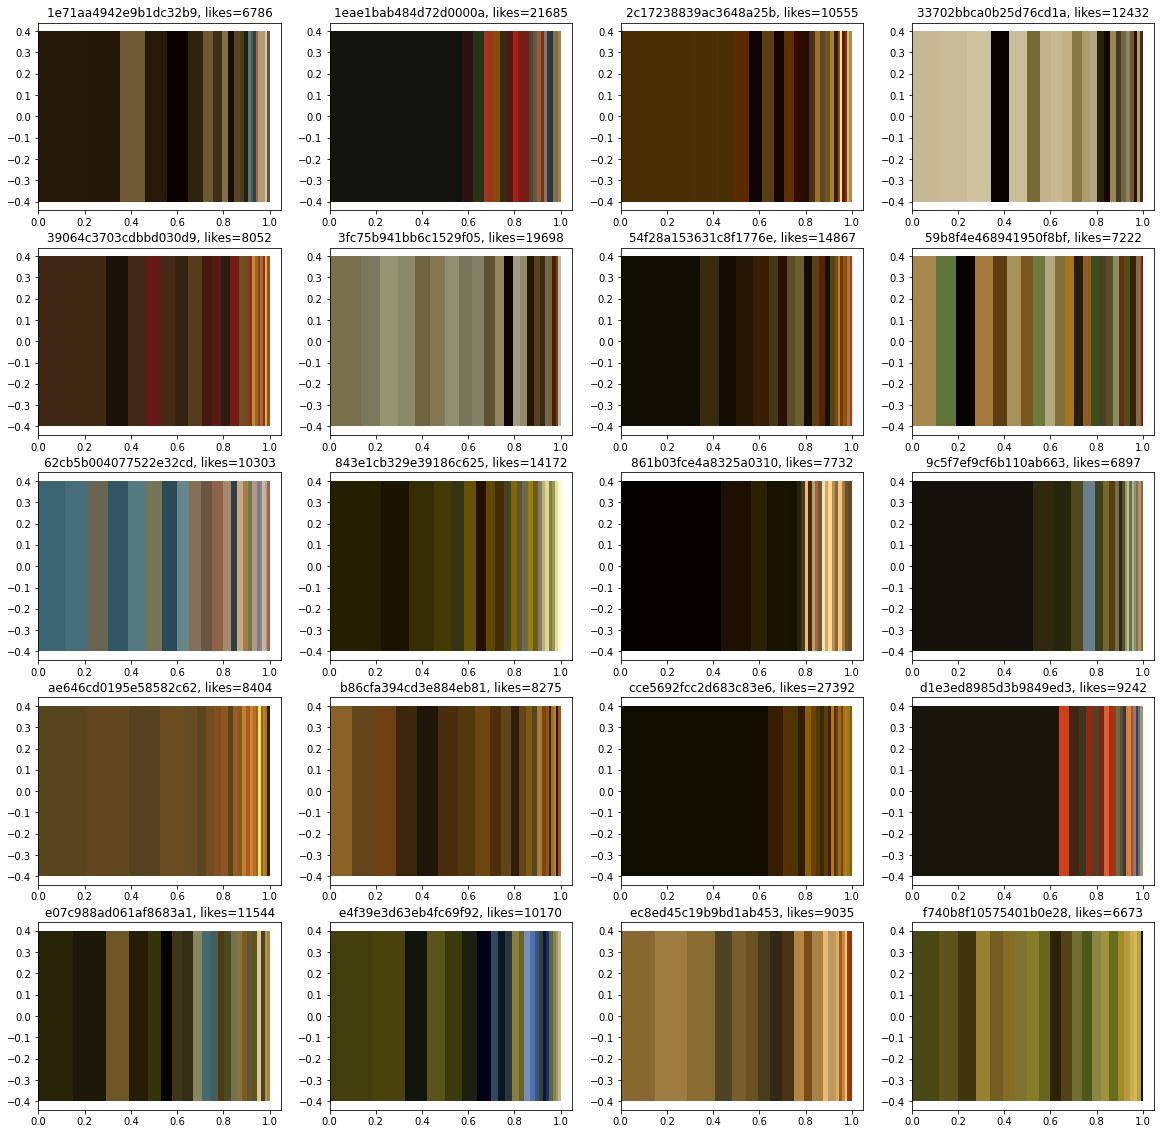

In [19]:
train_df_top20 = art_ds.train_df.sort_values(by="likes", ascending=False).head(20)
palette_df_top20 = art_ds.palette_df.merge(train_df_top20, on="object_id", how="inner").sort_values(by=["likes", "object_id"])

fig = plt.figure(figsize=(20, 20))

for i, (index, df) in enumerate(palette_df_top20.groupby(["object_id"])):
    ax = fig.add_subplot(5, 4, i+1)

    left = 0
    for index, row in df.sort_values(by="ratio", ascending=False).iterrows():
        color = '#' + format(row['color_r'], '02x') + format(row['color_g'], '02x') + format(row['color_b'], '02x')
        ax.barh(0, row['ratio'], color=color, left=left)
        ax.set_title('{}, likes={}'.format(row['object_id'], row['likes']))
        left += row['ratio']

plt.show()

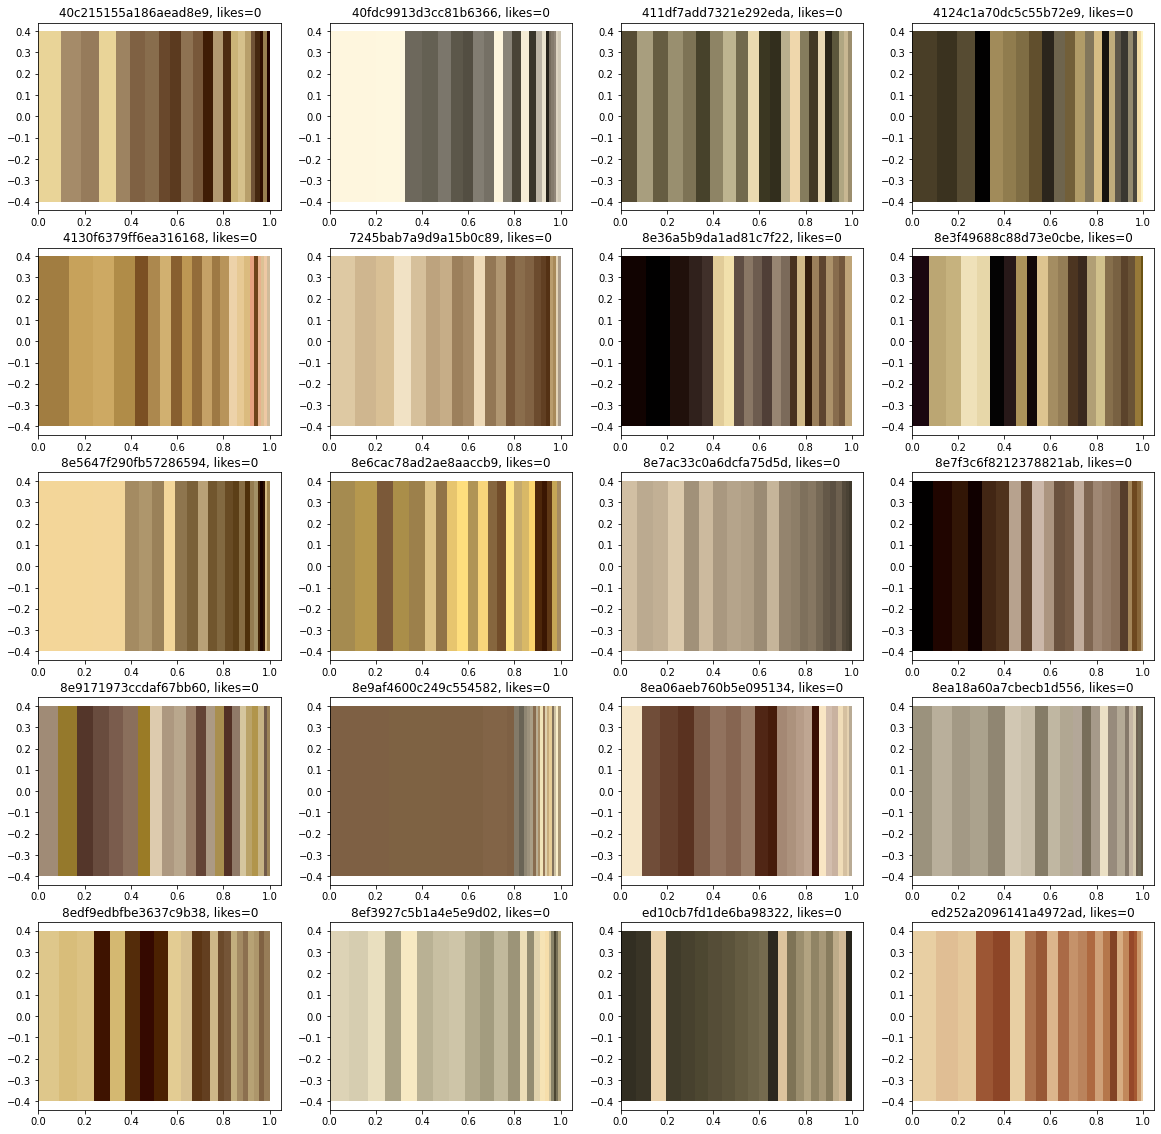

In [21]:
train_df_bottom20 = art_ds.train_df.sort_values(by="likes").head(20)
palette_df_bottom20 = art_ds.palette_df.merge(train_df_bottom20, on="object_id", how="inner").sort_values(by=["likes", "object_id"])

fig = plt.figure(figsize=(20, 20))

for i, (index, df) in enumerate(palette_df_bottom20.groupby(["object_id"])):
    ax = fig.add_subplot(5, 4, i+1)

    left = 0
    for index, row in df.sort_values(by="ratio", ascending=False).iterrows():
        color = '#' + format(row['color_r'], '02x') + format(row['color_g'], '02x') + format(row['color_b'], '02x')
        ax.barh(0, row['ratio'], color=color, left=left)
        ax.set_title('{}, likes={}'.format(row['object_id'], row['likes']))
        left += row['ratio']

## 色の変換(RGB, HexCode, HSV)

In [37]:
pd.DataFrame(art_ds.color_df["hex"].str.strip().map(ImageColor.getrgb).values.tolist(), columns=["r", "g", "b"])

,r,g,b
0,199,199,182
1,94,83,51
2,62,50,27
3,184,175,132
4,21,18,12
...,...,...,...
73631,157,159,145
73632,89,83,56
73633,110,118,105
73634,58,31,17
